(<matplotlib.axes._subplots.AxesSubplot at 0x7f78f7f7f5c0>,
 Text(0.5, 1.0, 'LoG'))

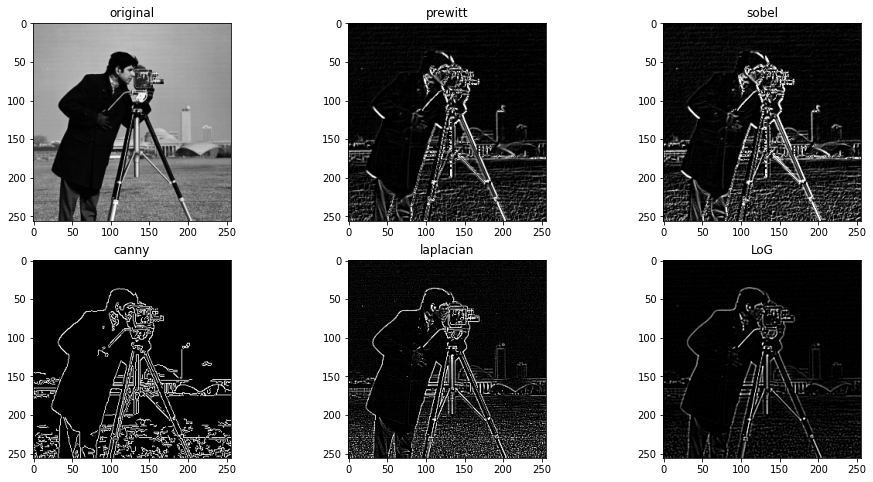

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread('cameraman.tif',0)

#canny
img_canny = cv2.Canny(img,100,200)

#sobel
img_sobelx = cv2.Sobel(img,cv2.CV_8U,1,0,ksize=3)
img_sobely = cv2.Sobel(img,cv2.CV_8U,0,1,ksize=3)
img_sobel = img_sobelx + img_sobely

#prewitt
kernelx = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
img_prewittx = cv2.filter2D(img,-1,kernelx)
img_prewitty = cv2.filter2D(img,-1,kernely)
img_prewitt = img_prewittx + img_prewitty

#laplacian
laplacian = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
img_laplacian = cv2.filter2D(img,-1,laplacian)

#laplacian of Gaussian(LoG)
K_SIZE = 3
smoothed_img = cv2.GaussianBlur(img,(K_SIZE,K_SIZE),0)
laplacian = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
img_LoG = cv2.filter2D(smoothed_img,-1,laplacian)

fig = plt.figure(figsize=(16,8))
fig.add_subplot(2,3,1), plt.imshow(img, cmap='gray'), plt.title('original')
fig.add_subplot(2,3,2), plt.imshow(img_prewitt, cmap='gray'), plt.title('prewitt')
fig.add_subplot(2,3,3), plt.imshow(img_sobel, cmap='gray'), plt.title('sobel')
fig.add_subplot(2,3,4), plt.imshow(img_canny, cmap='gray'), plt.title('canny')
fig.add_subplot(2,3,5), plt.imshow(img_laplacian, cmap='gray'), plt.title('laplacian')
fig.add_subplot(2,3,6), plt.imshow(img_LoG, cmap='gray'), plt.title('LoG')

Analysis the result:

    - Prewitt and Sobel: ทั้งคู่แทบ ทั้งคู่ดู นูนๆมีมิติ เเละการทำขอบยังไม่ดีนัก เช่นตรงตัวคน
    - Canny: ดูมีรายละเอียดที่เยอะ และเส้นขอบก็ดูให้น้ำหนักเหมือนๆกัน เส้นขอบบางอันที่จางๆก็ไม่ปรากฎ
    - laplacian: เส้นขอบชัดเจน ขอบมีน้ำหนักเข้มและจาง
    - laplacian of Gaussian: เห็นจุดที่มันชัดของ laplacian ปกติ และดูเหมือนที่พื้น ลักษณะคล้าย noise จะหายไป เพราะภาพผ่านการ blur มาก่อน